In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/user/Desktop/shlee/homework/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/Users/user/Desktop/shlee/homework/input\sample_submission.csv
C:/Users/user/Desktop/shlee/homework/input\test.csv
C:/Users/user/Desktop/shlee/homework/input\train.csv


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

print("Pandas", pd.__version__)
print("NumPy", np.__version__)

Pandas 1.5.3
NumPy 1.23.5


In [7]:
img_size = 28
batch_size = 64
validation_split = 0.1
epochs = 8

In [8]:
train_raw_dataset = pd.read_csv("C:/Users/user/Desktop/shlee/homework/input/train.csv")
test_raw_dataset = pd.read_csv("C:/Users/user/Desktop/shlee/homework/input/test.csv")

In [9]:
def preprocess(train_raw_dataset, test_raw_dataset):
    # Work with train data
    X_train = train_raw_dataset.drop(["label"], axis=1)
    X_train = X_train.values.astype("float32")
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
    X_train /= 255
    X_train = X_train.clip(0, 1)

    y_train = train_raw_dataset["label"]
    y_train = y_train.values
    y_train = np_utils.to_categorical(y_train, 10)
    
    # Split to train/validation set
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, 
        y_train, 
        test_size=validation_split, 
        shuffle=True
    )
    
    # Work with test data
    X_test = test_raw_dataset.values.astype("float32")
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)
    X_test /= 255
    X_test = X_test.clip(0, 1)
    
    return X_train, X_valid, y_train, y_valid, X_test

X_train, X_valid, y_train, y_valid, X_test = preprocess(train_raw_dataset, test_raw_dataset)

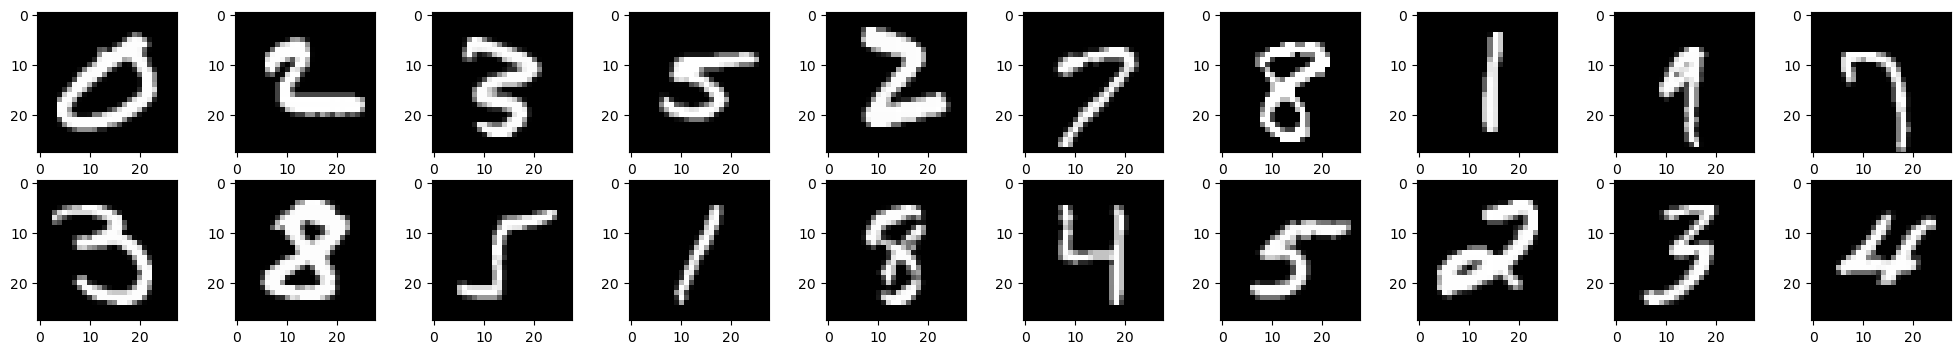

In [10]:
fig = plt.figure(figsize=(25, 4))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

In [11]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    data_format="channels_last",
    validation_split=validation_split
)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

datagen_flow = datagen.flow(X_train, y_train, batch_size=batch_size)

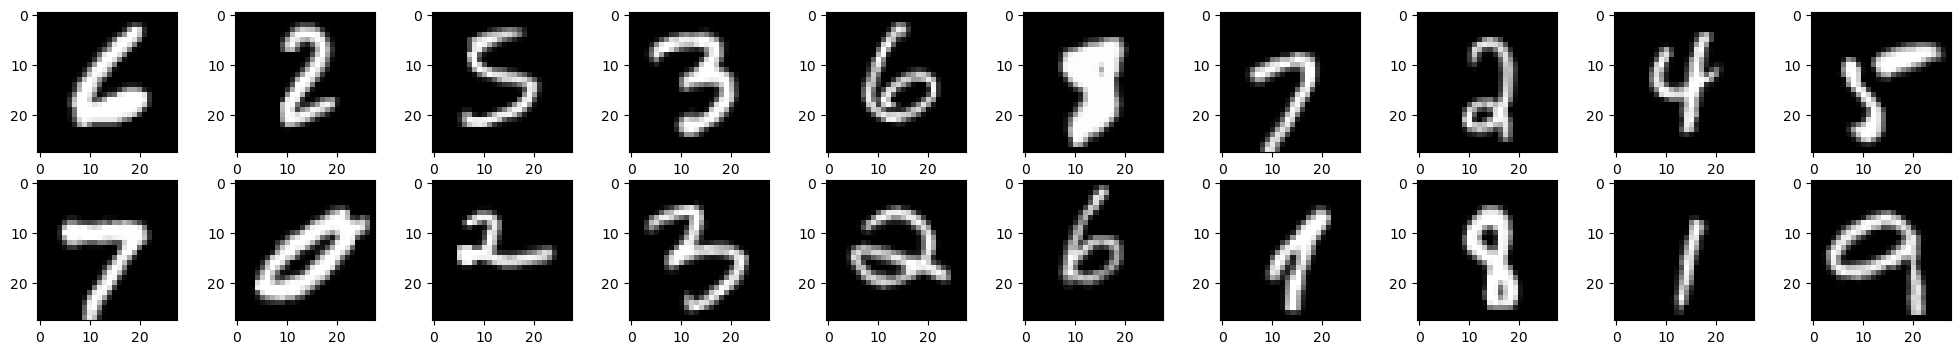

In [12]:
fig = plt.figure(figsize=(25, 4))
for X_batch, y_batch in datagen_flow:
    for i in range(20):
        ax = fig.add_subplot(2, 10, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [13]:
input_shape = (img_size, img_size, 1)

model = Sequential()
model.add(Convolution2D(32, (5, 5), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Convolution2D(64, (5, 5), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [14]:
train_history = model.fit_generator(
    datagen_flow, 
    epochs=epochs, 
    steps_per_epoch=(len(X_train) / batch_size), 
    validation_data=(X_valid, y_valid)
)

Epoch 1/8


C:\Users\user\AppData\Local\Temp\ipykernel_6052\516153850.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_history = model.fit_generator(


590/590 [==============================] - 22s 36ms/step - loss: 0.2052 - accuracy: 0.9360 - val_loss: 0.0509 - val_accuracy: 0.9831
Epoch 2/8
590/590 [==============================] - 23s 39ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 3/8
590/590 [==============================] - 24s 40ms/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0328 - val_accuracy: 0.9886
Epoch 4/8
590/590 [==============================] - 22s 38ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 5/8
590/590 [==============================] - 23s 38ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 6/8
590/590 [==============================] - 23s 39ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0247 - val_accuracy: 0.9919
Epoch 7/8
590/590 [==============================] - 23s 38ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0233 - val_accuracy: 0.9924
Epoch 8/8

Text(0, 0.5, 'Loss')

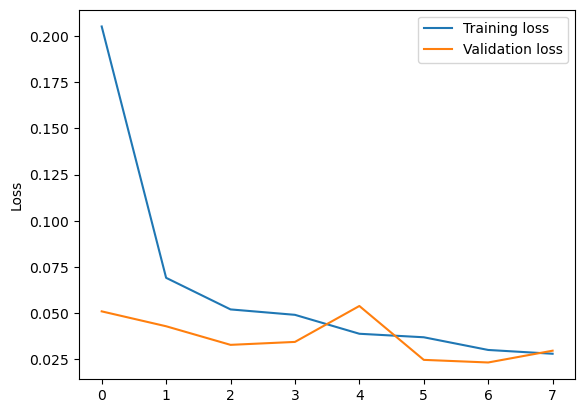

In [15]:
plt.plot(train_history.history["loss"], label="Training loss")
plt.plot(train_history.history["val_loss"], label="Validation loss")
plt.legend()
plt.ylabel('Loss')

Text(0, 0.5, 'Acc')

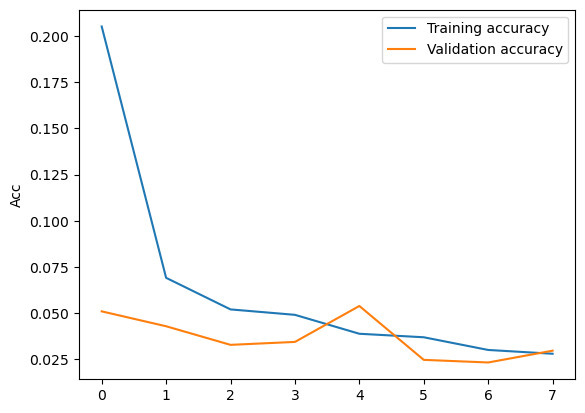

In [16]:
plt.plot(train_history.history["loss"], label="Training accuracy")
plt.plot(train_history.history["val_loss"], label="Validation accuracy")
plt.legend()
plt.ylabel('Acc')

In [17]:
test = model.predict(X_test)
test_labels = np.argmax(test, axis=1)

875/875 [==============================] - 5s 5ms/step


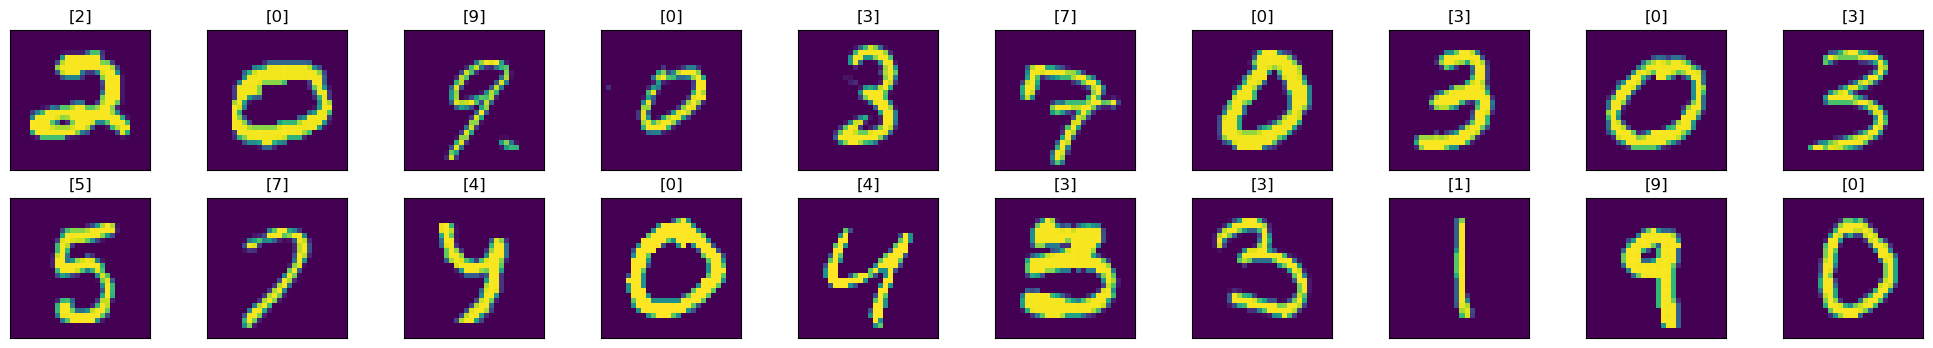

In [18]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(X_test[idx].reshape(28, 28))
    ax.set_label([test_labels[idx]])
    ax.set_title([test_labels[idx]])

In [19]:
results = pd.Series(test_labels, name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), results],axis = 1)
submission.to_csv("mnist_prediction.csv", index=False)